In [3]:
import pandas as pd
from backend.app.fetch_data_yf import CSV, plot_price_trends, fetch_historical_coin_data

In [47]:
crypto_data = fetch_historical_coin_data()


successfully obtained top 30 coins by market cap
cryptos: 
  ['BTC-USD', 'ETH-USD', 'XRP-USD', 'USDT-USD', 'BNB-USD', 'SOL-USD', 'USDC-USD', 'ADA-USD', 'DOGE-USD', 'TRX-USD', 'STETH-USD', 'PI-USD', 'WBTC-USD', 'LINK-USD', 'HBAR-USD', 'WSTETH-USD', 'XLM-USD', 'LEO-USD', 'AVAX-USD', 'SUI-USD', 'USDS-USD', 'LTC-USD', 'SHIB-USD', 'BCH-USD', 'TON-USD', 'DOT-USD', 'OM-USD', 'WETH-USD', 'HYPE-USD', 'USDE-USD']


[*********************100%***********************]  30 of 30 completed

30 Failed downloads:
['WBTC-USD', 'LTC-USD', 'ADA-USD', 'USDE-USD', 'AVAX-USD', 'LINK-USD', 'BNB-USD', 'WSTETH-USD', 'USDT-USD', 'LEO-USD', 'ETH-USD', 'BTC-USD', 'SHIB-USD', 'HYPE-USD', 'XRP-USD', 'STETH-USD', 'XLM-USD', 'SOL-USD', 'USDC-USD', 'BCH-USD', 'DOT-USD', 'DOGE-USD', 'PI-USD', 'SUI-USD', 'USDS-USD', 'HBAR-USD', 'TON-USD', 'OM-USD', 'WETH-USD', 'TRX-USD']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [49]:
try:
    data = pd.read_csv(CSV, sep=',', encoding='utf8', index_col=0, parse_dates=True)
    print(data.head(3).to_markdown())
except Exception as e:
    print(f"Error loading data: {e}")



| Date                |   ADA-USD |   AVAX-USD |   BCH-USD |   BNB-USD |   BTC-USD |   DOGE-USD |   DOT-USD |   ETH-USD |   HBAR-USD |   LEO-USD |   LINK-USD |   LTC-USD |   OM-USD |   PI-USD |   SHIB-USD |   SOL-USD |   STETH-USD |   TON-USD |   TRX-USD |   USDC-USD |   USDT-USD |   WBTC-USD |   WETH-USD |   WSTETH-USD |   XLM-USD |   XRP-USD |
|:--------------------|----------:|-----------:|----------:|----------:|----------:|-----------:|----------:|----------:|-----------:|----------:|-----------:|----------:|---------:|---------:|-----------:|----------:|------------:|----------:|----------:|-----------:|-----------:|-----------:|-----------:|-------------:|----------:|----------:|
| 2024-03-06 00:00:00 |  0.733821 |    41.5143 |   415.128 |   429.012 |   66106.8 |   0.157791 |   10.5142 |   3819.23 |   0.125818 |   5.48234 |    20.076  |   85.83   | 0.312082 | 0.005099 |    3.3e-05 |   130.742 |     3819.76 |   2.88386 |  0.137763 |   0.999801 |    1.00045 |    66224.6 |    3821.

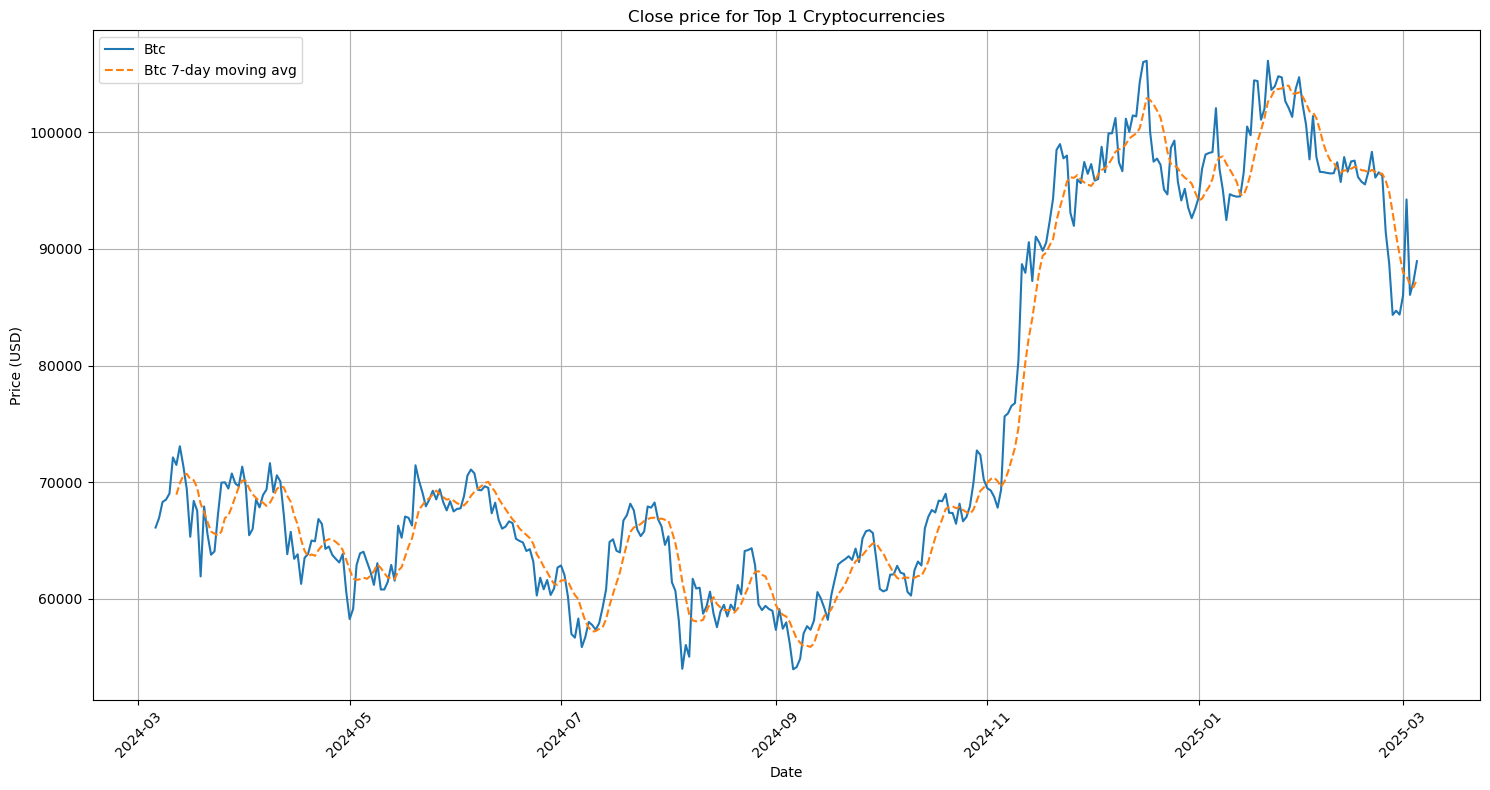

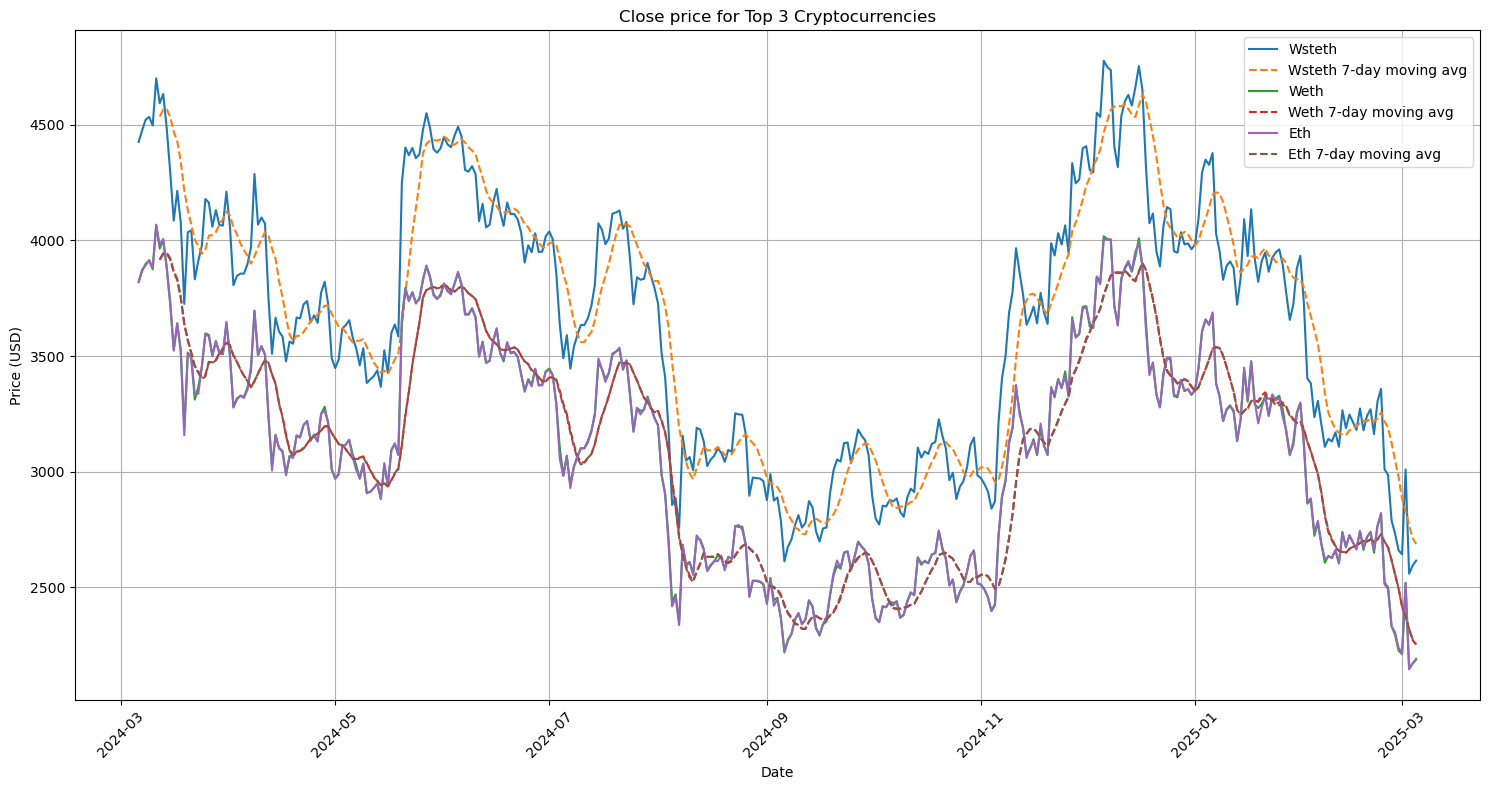

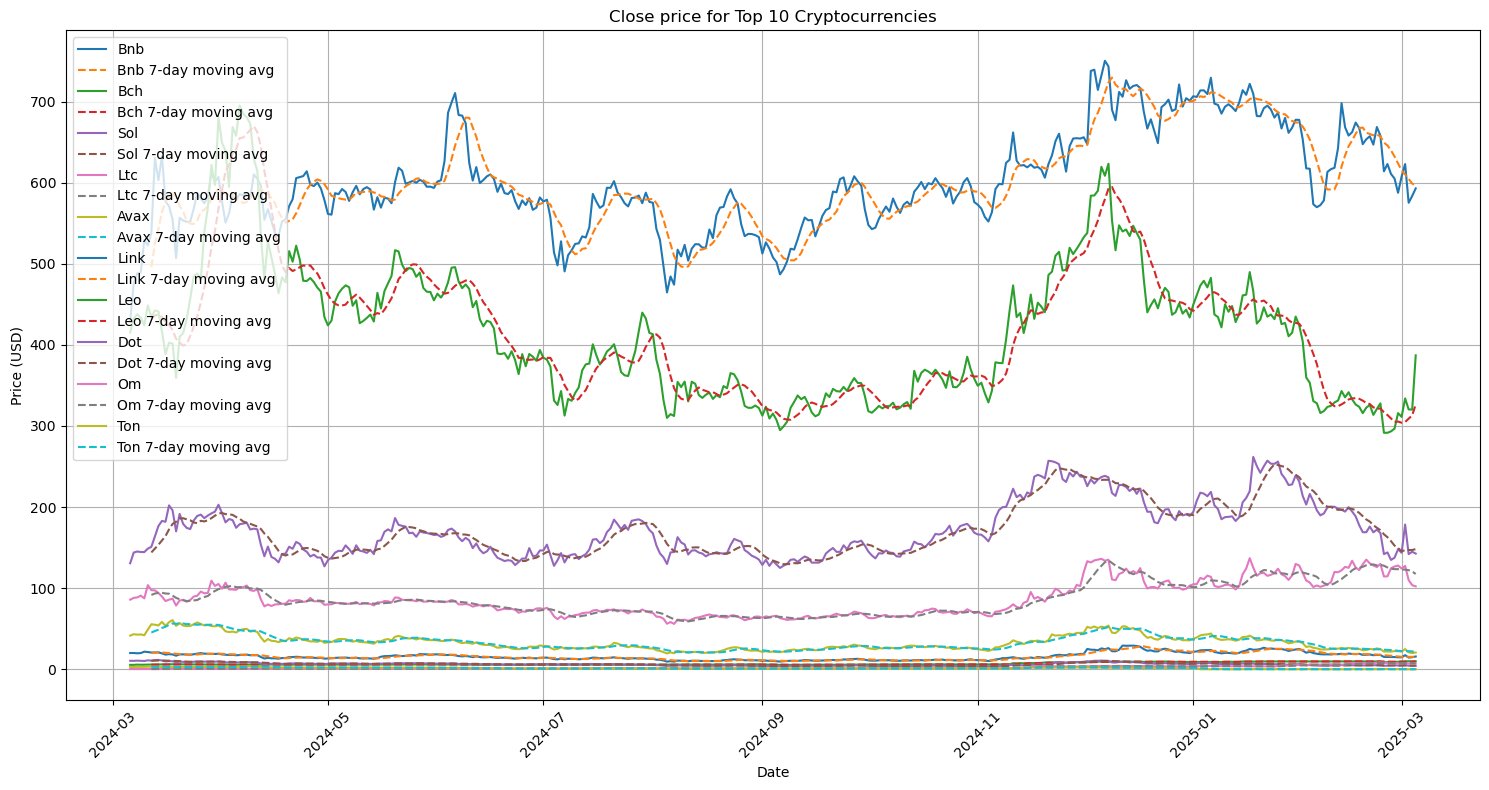

In [5]:
# data.mean().to_list()
btc = data.loc[:,'BTC-USD'].to_frame()
plot_price_trends(btc, 1)
plot_price_trends(data.drop(['BTC-USD', 'WBTC-USD'], axis=1), 3)
plot_price_trends(data.drop(['BTC-USD', 'WBTC-USD', 'WSTETH-USD', 'WETH-USD', 'ETH-USD', 'STETH-USD'], axis=1), 10)

In [58]:
# stationarity analysis
from statsmodels.tsa.stattools import adfuller
from IPython.display import Markdown, display

selected_coins = ['BNB-USD', 'BTC-USD', 'WETH-USD']

def get_adf_stats(selected_coins: list):
    results = {}
    for coin in selected_coins:
        x = data.loc[:,coin].values
        stationary_stats = adfuller(x)
        results[coin] = dict(adf=stationary_stats[0],
                            p_value=stationary_stats[1],
                            critical_values=stationary_stats[4])
    
    # for k,v in result.items():
    #     print(f"{k} : {v}")
    return results

ads_stats = get_adf_stats(selected_coins)

table = "|"
ruler = "|"
tmp = len(table)
table += "Coin |"
ruler += "-" * (len(table) - tmp - 1) + "|"

for k in ads_stats[selected_coins[0]].keys():
    if isinstance(ads_stats[selected_coins[0]][k], dict):
        for sub_k in ads_stats[selected_coins[0]][k]:
            tmp = len(table)
            table += f" {sub_k} |"
            ruler += "-" * (len(table) - tmp - 1) + "|"
    else:
        tmp = len(table)
        table += f" {k} |"
        ruler += "-" * (len(table) - tmp - 1) + "|"
table += "\n"
ruler += "\n"
table += ruler
table += "|"
for coin, ads_stat in ads_stats.items():
    tmp = len(table)
    table += f"{coin} |"
    for v in ads_stat.values():
        if isinstance(v, dict):
            for sub_v in v.values():
                table += f" {sub_v} |"
        else:
            table += f" {v} |"
    table += "\n"

display(Markdown(table))

|Coin | adf | p_value | 1% | 5% | 10% |
|-----|-----|---------|----|----|-----|
|BNB-USD | -3.6784793244900236 | 0.004426248907938432 | -3.4484434475193777 | -2.869513170510808 | -2.571017574266393 |
BTC-USD | -1.1333002557353724 | 0.7016111563478268 | -3.4484434475193777 | -2.869513170510808 | -2.571017574266393 |
WETH-USD | -2.016100927477295 | 0.27955832974867445 | -3.4484434475193777 | -2.869513170510808 | -2.571017574266393 |


## for coins 'BNB-USD', 'BTC-USD', 'WETH-USD'

### BNB

high negative ADF (less than 1%) with a very low P value.

suggesting a high probability that the coin is stationary over the past year.


### BTC

looking at the plot over the past year clearly shows this is non-stationary...

the ADF is close to zero with a high P value, confirming it is non-stationary.

### WETH

negative ADF (higher than 10% indicating low confidence) with a high P value.

suggesting this coin is also non-stationary. Less so, however than a coin like BTC.

In [4]:

# Create a feature matrix where each row is a cryptocurrency
# and each column is a day (transpose the data)
price_features = data.T

# Replace any remaining NaN values with 0
price_features = price_features.fillna(0)

print(f"Feature matrix shape: {price_features.shape}")
print(f"Each row represents a cryptocurrency, each column a day's price")
print(price_features.index)
print(price_features.head(3).to_markdown())

Feature matrix shape: (26, 365)
Each row represents a cryptocurrency, each column a day's price
Index(['ADA-USD', 'AVAX-USD', 'BCH-USD', 'BGB-USD', 'BNB-USD', 'BTC-USD',
       'DOGE-USD', 'DOT-USD', 'ETH-USD', 'HBAR-USD', 'LEO-USD', 'LINK-USD',
       'LTC-USD', 'OM-USD', 'SHIB-USD', 'SOL-USD', 'STETH-USD', 'TON-USD',
       'TRX-USD', 'USDC-USD', 'USDT-USD', 'WBTC-USD', 'WETH-USD', 'WSTETH-USD',
       'XLM-USD', 'XRP-USD'],
      dtype='object')
|          |   2024-02-28 00:00:00 |   2024-02-29 00:00:00 |   2024-03-01 00:00:00 |   2024-03-02 00:00:00 |   2024-03-03 00:00:00 |   2024-03-04 00:00:00 |   2024-03-05 00:00:00 |   2024-03-06 00:00:00 |   2024-03-07 00:00:00 |   2024-03-08 00:00:00 |   2024-03-09 00:00:00 |   2024-03-10 00:00:00 |   2024-03-11 00:00:00 |   2024-03-12 00:00:00 |   2024-03-13 00:00:00 |   2024-03-14 00:00:00 |   2024-03-15 00:00:00 |   2024-03-16 00:00:00 |   2024-03-17 00:00:00 |   2024-03-18 00:00:00 |   2024-03-19 00:00:00 |   2024-03-20 00:00:00 |   2024

In [5]:
# Import additional required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

rows of data:  26
Reduced dimensions from 365 to 10
Total variance explained: 100.00%
returning PCA with optimal_components=10
|          |      PC1 |       PC2 |          PC3 |         PC4 |          PC5 |          PC6 |         PC7 |          PC8 |         PC9 |         PC10 |
|:---------|---------:|----------:|-------------:|------------:|-------------:|-------------:|------------:|-------------:|------------:|-------------:|
| ADA-USD  | -6.10442 | 0.107403  |  0.000478464 |  0.00455483 | -0.000111712 |  0.000127292 | -0.0005495  | -0.000577445 | 0.000262833 |  0.000134053 |
| AVAX-USD | -6.07166 | 0.10114   | -0.00160116  |  0.00320299 |  0.00372663  |  0.000918749 |  0.00162906 |  0.00249618  | 0.000686561 | -0.00314205  |
| BCH-USD  | -5.68722 | 0.0363201 | -0.00551238  | -0.0459298  |  0.0335484   | -0.000991219 | -0.00184425 | -0.000505526 | 0.000103748 |  1.78921e-05 |


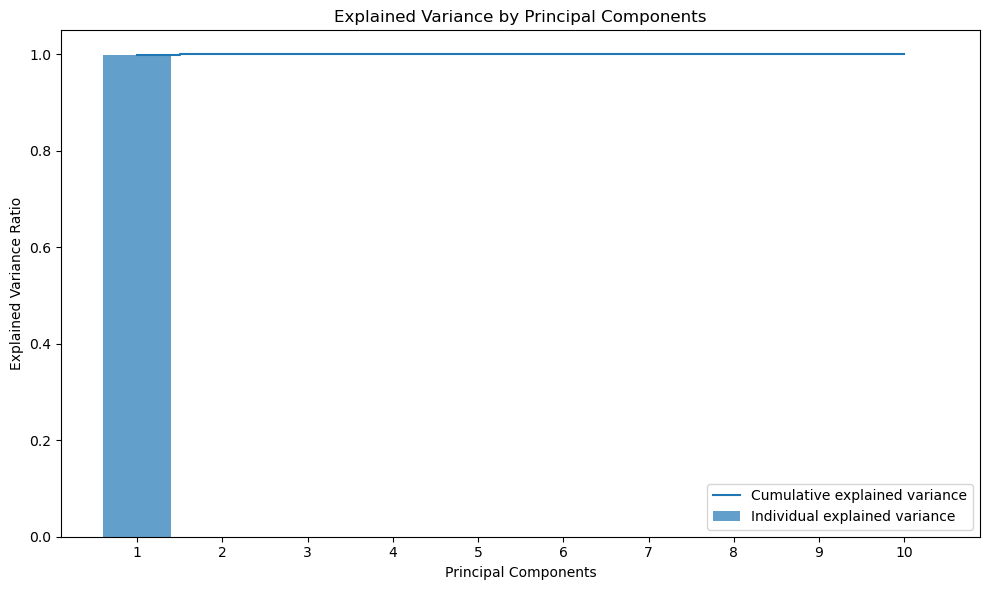

In [6]:
def reduce_dimensions(features: pd.DataFrame, n_components=10, optimise=False):
    """
    Perform dimensionality reduction on cryptocurrency data using PCA
    
    Args:
        features (pandas.DataFrame): Feature matrix (cryptocurrencies as rows)
        n_components (int): Number of components to reduce to
        
    Returns:
        DataFrame with reduced dimensions, PCA model
    """
    # Standardize the data
    print("rows of data: ", features.shape[0])
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(scaled_features)
    
    # Calculate explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    if optimise:
        optimal_components = sum(np.less_equal(cumulative_variance, np.full(len(cumulative_variance), 0.99)))
        if not optimal_components:
            # the cumulative variance is higher than the desired threshold from the first component
            optimal_components = 2
    else:
        optimal_components=n_components
    
    print(f"Reduced dimensions from {features.shape[1]} to {optimal_components}")
    print(f"Total variance explained: {cumulative_variance[2]:.2%}")
    print(f'returning PCA with {optimal_components=}')
    pca = PCA(n_components=optimal_components)
    pca.fit_transform(scaled_features)
    
    # Apply PCA
    pca = PCA(n_components=optimal_components)
    reduced_features = pca.fit_transform(scaled_features)
    
    # Create DataFrame with reduced features
    reduced_df = pd.DataFrame(
        reduced_features, 
        index=features.index,
        columns=[f'PC{i+1}' for i in range(optimal_components)]
    )

    print(reduced_df.head(3).to_markdown())
    
    # Plot explained variance
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n_components+1), explained_variance, alpha=0.7, label='Individual explained variance')
    plt.step(range(1, n_components+1), cumulative_variance, where='mid', label='Cumulative explained variance')
    plt.xticks(np.arange(1, n_components+1, 1))
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Principal Components')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return reduced_df, pca

# Reduce dimensions to 10 principal components
reduced_features, pca_model = reduce_dimensions(price_features, n_components=10, optimise=False)

## are the values, magnitude and variance of BTC causing the explained variance to be consumed by a single component?

### in other words, is BTC causing some sort of bias or skewness?

experiment with PCA on all other rows besides BTC

rows of data:  25
Reduced dimensions from 365 to 5
Total variance explained: 100.00%
returning PCA with optimal_components=5
|          |      PC1 |       PC2 |         PC3 |          PC4 |          PC5 |
|:---------|---------:|----------:|------------:|-------------:|-------------:|
| ADA-USD  | -4.69987 | 0.144966  |  0.00619152 | -0.000185633 |  0.000152607 |
| AVAX-USD | -4.65539 | 0.136494  |  0.0042815  |  0.00535391  |  0.00137486  |
| BCH-USD  | -4.13343 | 0.0489947 | -0.0625326  |  0.0458331   | -0.00141543  |


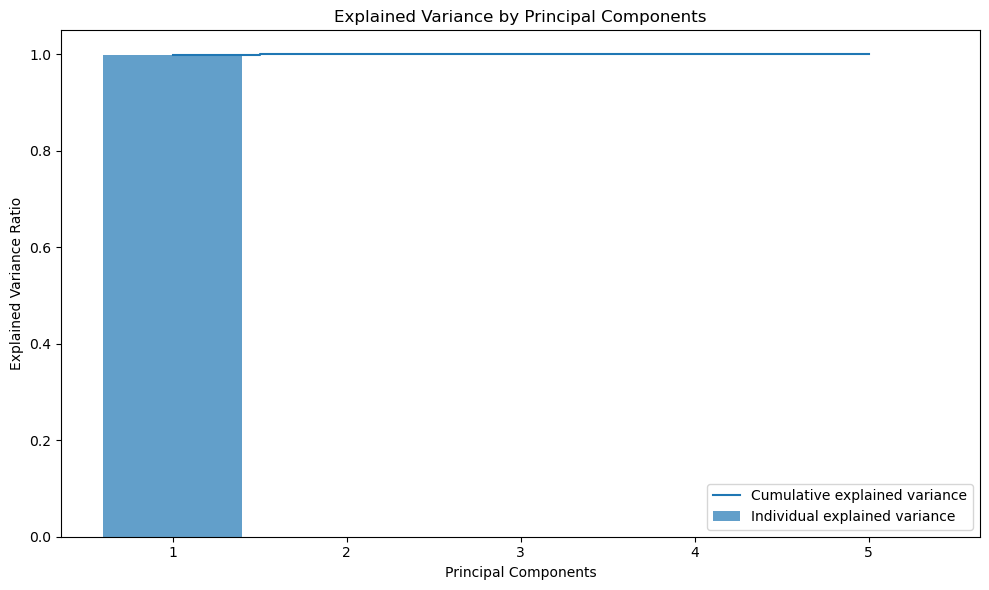

optimal components with BTC in the dataset 10.
 Optimal components without BTC in the dataset 5


In [7]:
features_no_btc = price_features.drop('BTC-USD', axis=0)

# Reduce dimensions to 5 principal components
reduced_features_wo_btc, pca_model_wo_btc = reduce_dimensions(features_no_btc, n_components=5)

print((f'optimal components with BTC in the dataset {pca_model.n_components_}.\n'),
      (f'Optimal components without BTC in the dataset {pca_model_wo_btc.n_components_}'))

# Determine optimal number of clusters

optimal n_clusters=2


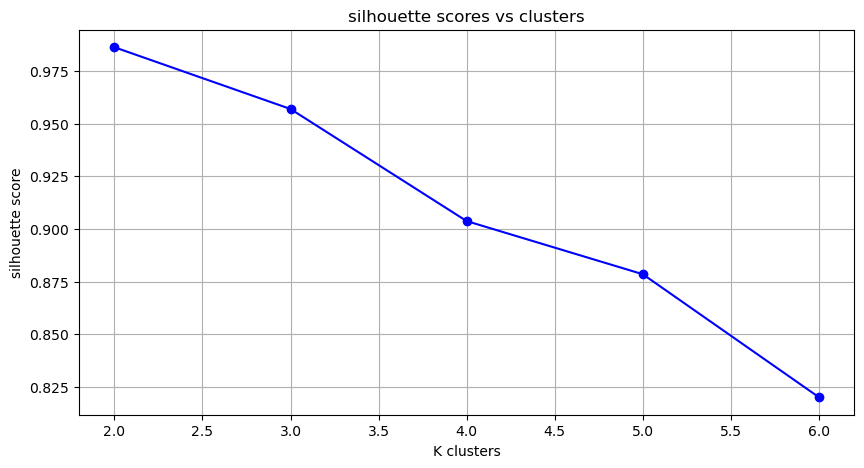

|          |      PC1 |       PC2 |          PC3 |         PC4 |          PC5 |          PC6 |         PC7 |          PC8 |         PC9 |         PC10 |   cluster |
|:---------|---------:|----------:|-------------:|------------:|-------------:|-------------:|------------:|-------------:|------------:|-------------:|----------:|
| ADA-USD  | -6.10442 | 0.107403  |  0.000478464 |  0.00455483 | -0.000111712 |  0.000127292 | -0.0005495  | -0.000577445 | 0.000262833 |  0.000134053 |         0 |
| AVAX-USD | -6.07166 | 0.10114   | -0.00160116  |  0.00320299 |  0.00372663  |  0.000918749 |  0.00162906 |  0.00249618  | 0.000686561 | -0.00314205  |         0 |
| BCH-USD  | -5.68722 | 0.0363201 | -0.00551238  | -0.0459298  |  0.0335484   | -0.000991219 | -0.00184425 | -0.000505526 | 0.000103748 |  1.78921e-05 |         0 |


In [8]:
def clustering_cryptos(price_features_df: pd.DataFrame, n_clusters=4):
    """
    Cluster cryptocurrencies based on reduced features
    
    Args:
        features (pandas.DataFrame): Reduced feature matrix
        n_clusters (int): Number of clusters to create
        
    Returns:
        DataFrame with cluster assignments, KMeans model
    """
    # if n_clusters is None
    if n_clusters is None:
        silhouette_scores = []
        # Perform silhouette from 2 to 6 K clusters
        K = range(2,7)
        for k in K:
            kmeans = KMeans(n_clusters=k).fit(price_features_df)
            silhouette_scores.append(
                silhouette_score(price_features_df, kmeans.labels_)
            )
        # get the optimal number of clusters
        n_clusters = K[np.argmax((silhouette_scores))]
        print(f"optimal {n_clusters=}")
        # Plot silhouetter scores
        plt.figure(figsize=(10,5))
        plt.plot(K, silhouette_scores, 'bo-')
        plt.grid(True)
        plt.ylabel("silhouette score")
        plt.xlabel("K clusters")
        plt.title("silhouette scores vs clusters")
        plt.show()
    # train the final kemans model
    kmeans = KMeans(n_clusters=n_clusters).fit(price_features_df)
    # copy the dataset
    clustered_df = price_features_df.copy()
    # add a column for the kmeans with the kmeans cluster labels (output of fit function)
    clustered_df['cluster'] = kmeans.labels_
    print(clustered_df.head(3).to_markdown())
    # return the dataframe and kmeans model
    return clustered_df, kmeans
    
clustered_df, kmeans_model = clustering_cryptos(price_features_df=reduced_features, n_clusters=None)
    

## plot the clusters in 2D space

In [9]:
import plotly.express as px

def visualise_clusters(clustered_df:pd.DataFrame):
    """
    Place clusters on a scatter plot
    If required, reduce dimensionality to 2 using t-SNE
    
    Args:
        clustered_df (pd.DataFrame) : price features, with output labels.
        
    """
    # take a copy of the df
    vis_df = clustered_df.copy()
    x_label = "PCA component 1"
    y_label = "PCA component 2"
    # if dimensions greater than two
    if vis_df.drop('cluster', axis=1).shape[1] > 2:
        # drop the cluster colun and perform t-SNE dimensionality reduction for the plot
        vis_tsne = TSNE(n_components=2, random_state=42, perplexity=6)
        x_tsne = vis_tsne.fit_transform(clustered_df.drop('cluster', axis=1))
        x_label = "t-SNE dimension 1"
        y_label = "t-SNE dimension 2"
        fig = px.scatter(x=x_tsne[:,0], y=x_tsne[:,1], color=vis_df.index)
        print("reduced visualisation dimensions to 2, using TSNE\nKL Divergence: ", vis_tsne.kl_divergence_)
    
    # create a dataframe of the new dimensions - this will be plotted
    fig = px.scatter(vis_df.drop('cluster', axis=1),
                     x='PC1',
                     y="PC2",
                     color=vis_df.index
                     )
    # create the plotly scatter
    # create the plot
    fig.update_layout(
        title=dict(text='Cryptocurrency Clusters Visualization'),
        xaxis_title=x_label,
        yaxis_title=y_label
    ) 
    """{
        'title': {'text':'Cryptocurrency Clusters Visualization'},
        'xaxis': {'text': x_label},
        'yaxis': {'text': y_label},
    }"""
    # set the x and y ticks to the df index i.e coin names
    fig.show()
    
visualise_clusters(clustered_df)
    
    
    

reduced visualisation dimensions to 2, using TSNE
KL Divergence:  0.0584716722369194


## Analyse correlations

In [ ]:
def analyse_correlations(data, crypto_cluster_representatives):
    """
    Analyse correlations between selected coins and all cryptos in the dataset
    
    Args
        data (pandas.DataFrame): dataset of all coins and their closing prices
        crypto_cluster_representatives (list):
                                 list of selected coins
    Returns
        DataFrame: Correlation matrix
    """
    # get column names for representatives - should match but best to extract from the dataset
    representative_col_names = [col for col in data.columns if any(rep.lower() in col.lower() for rep in crypto_cluster_representatives)]
    print("representative coins found in dataset:\n",representative_col_names)
    # calculate the correlation matrix for the entire close dataset
    corr_matrix = data.corr()
    # extract the correlations for the selected coins
    representatives_correlation_matrix = corr_matrix[representative_col_names]
    # plot correlation heatmap
    fig = px.imshow(
        representatives_correlation_matrix,
        labels=dict(color="correlation"),
        color_continuous_scale="Inferno_r",
        text_auto=True,
        aspect='auto',
        height=1000,
    )
    fig.update_xaxes(side='top')
    fig.show()
    return representatives_correlation_matrix
# use the scatter plot in the above cell to pick a coin from each cluster group.

selected_coin_corr = analyse_correlations(data, selected_coins)

representative coins found in dataset:
 ['BNB-USD', 'BTC-USD', 'WBTC-USD', 'WETH-USD']


# Find correlation extremes


In [ ]:
def get_corr_extremes(corr_matrix: pd.DataFrame, num_pos_neg_coins=4):
    
    results = {}
    # iterate through each column in the matrix
    for repr_col in corr_matrix.columns:
        # get the correlation for this column, dropping the self-corr column
        representative_corr = corr_matrix[repr_col].drop(repr_col)
        # get the list of the top 4 positive correlations
        top_positives: pd.Series = representative_corr.nlargest(num_pos_neg_coins)
        # get the list of the top 4 negative correlations
        top_negatives: pd.Series = representative_corr.nsmallest(num_pos_neg_coins)
        # add to dict, a dict of the postive and negative corrs for a given column (coin)
        repr_name = repr_col.split('-')[0]
        results[repr_name] = {
            'positive': [(col.split('-')[0], corr) for col, corr in top_positives.items()],
            'negative': [(col.split('-')[0], corr) for col, corr in top_negatives.items()]
        }
        # print(repr_col)
        # print("top pos: ", top_positives.items())
        # print("top neg: ", top_negatives)
    # return the dict
    return results

top_pos_neg = get_corr_extremes(selected_coin_corr, 4)

for coin, data in top_pos_neg.items():
    print("%s - top positively correlated coins:" % coin)
    for corr_pos_coin, corr in data['positive']:
        print(f"Positively correlated coin: {corr_pos_coin} - Correlation: {corr}")
    print("%s - top negatively correlated coins:" % coin)
    for corr_neg_coin, corr in data['negative']:
        print(f"Negatively correlated coin: {corr_neg_coin} - Correlation: {corr}")

    
# TODO - put this into a nice markdown style table i.e 
"""
BNB - top correlated coins:
| selected coin | BTC | WBTC | DOGE | LEO | TON | USDT | USDC | DOT |
| BNB           | x   | y    | z    | k   | a   | b    | c    | d   |
| ...
"""

BNB - top positively correlated coins:
Positively correlated coin: BTC - Correlation: 0.8004668464364069
Positively correlated coin: WBTC - Correlation: 0.8000557892127584
Positively correlated coin: DOGE - Correlation: 0.7662133024674067
Positively correlated coin: LEO - Correlation: 0.7652108206375713
BNB - top negatively correlated coins:
Negatively correlated coin: TON - Correlation: -0.22135586874787905
Negatively correlated coin: USDT - Correlation: -0.16777666016087872
Negatively correlated coin: USDC - Correlation: 0.04091938808269733
Negatively correlated coin: DOT - Correlation: 0.20274037066896677
BTC - top positively correlated coins:
Positively correlated coin: WBTC - Correlation: 0.9999705446700913
Positively correlated coin: LEO - Correlation: 0.9586002839886542
Positively correlated coin: DOGE - Correlation: 0.9365443127151238
Positively correlated coin: XLM - Correlation: 0.9294896797196248
BTC - top negatively correlated coins:
Negatively correlated coin: TON - Correl